In [128]:
from keras.datasets import mnist

(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

Text(0.5, 1.0, 'Classe 5')

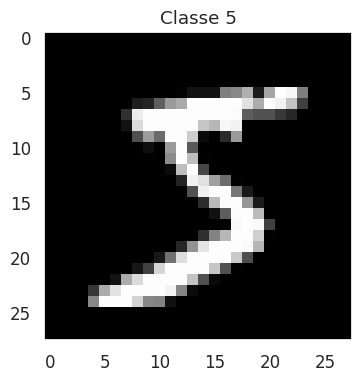

In [129]:
import matplotlib.pyplot as plt

plt.imshow(XTrain[0], cmap='gray')
plt.title('Classe ' + str(yTrain[0]))

In [130]:
XTrain = XTrain.reshape(XTrain.shape[0], 28, 28, 1)
XTest = XTest.reshape(XTest.shape[0], 28, 28, 1)

XTrain = XTrain.astype('float32')
XTest = XTest.astype('float32')

In [131]:
XTrain /= 255
XTest /= 255

In [132]:
from keras.utils import to_categorical

yTrain = to_categorical(yTrain, 10)
yTest = to_categorical(yTest, 10)

In [133]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)
test_generator = ImageDataGenerator()

XTrain = train_generator.flow(XTrain, yTrain, batch_size=128)
XTest = test_generator.flow(XTest, yTest, batch_size=128)

history = model.fit_generator(XTrain, steps_per_epoch=60000/128, epochs=5, validation_data=XTest, validation_steps=1000/128)

Epoch 1/5


/tmp/ipykernel_2736/3567435491.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(XTrain, steps_per_epoch=60000/128, epochs=5, validation_data=XTest, validation_steps=1000/128)


468/468 [==============================] - 27s 55ms/step - loss: 0.4127 - accuracy: 0.8663 - val_loss: 0.1799 - val_accuracy: 0.9434
Epoch 2/5
468/468 [==============================] - 25s 53ms/step - loss: 0.1616 - accuracy: 0.9504 - val_loss: 0.1054 - val_accuracy: 0.9727
Epoch 3/5
468/468 [==============================] - 25s 53ms/step - loss: 0.1297 - accuracy: 0.9607 - val_loss: 0.0541 - val_accuracy: 0.9805
Epoch 4/5
468/468 [==============================] - 25s 53ms/step - loss: 0.1105 - accuracy: 0.9668 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 5/5
468/468 [==============================] - 25s 54ms/step - loss: 0.1027 - accuracy: 0.9686 - val_loss: 0.0565 - val_accuracy: 0.9814


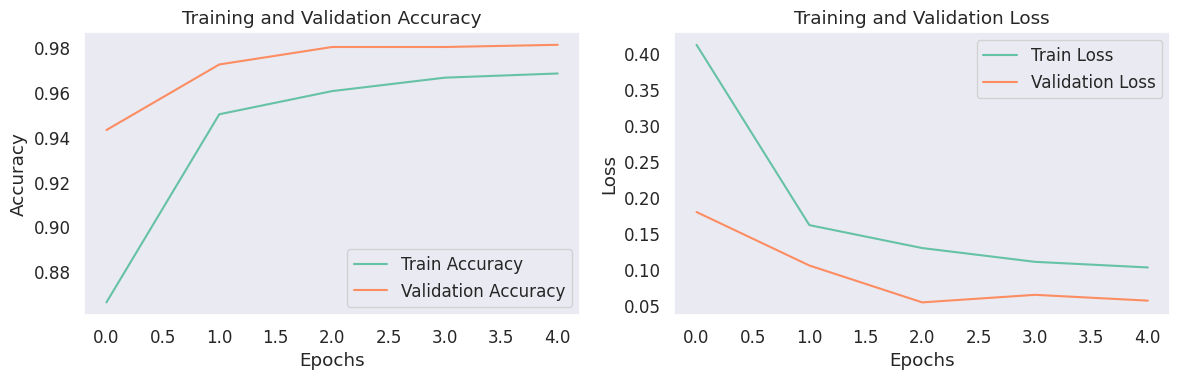

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark', palette='Set2', font_scale=1.1, rc={'figure.figsize': [8, 4]})

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [137]:
model_architecture = model.to_json()
with open('model-architecture.json', 'w') as f:
    f.write(model_architecture)

model.save_weights('model_weights.h5')